In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
# 파일 열기 및 피처 분석하기
file_path = '../data/drinks.csv'
drinks = pd.read_csv(file_path, sep = ',')
drinks['continent'] = drinks['continent'].fillna('OT')
drinks.info()
drinks.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       193 non-null    object 
 1   beer_servings                 193 non-null    int64  
 2   spirit_servings               193 non-null    int64  
 3   wine_servings                 193 non-null    int64  
 4   total_litres_of_pure_alcohol  193 non-null    float64
 5   continent                     193 non-null    object 
dtypes: float64(1), int64(3), object(2)
memory usage: 9.2+ KB


,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,AS
1,Albania,89,132,54,4.9,EU
2,Algeria,25,0,14,0.7,AF
3,Andorra,245,138,312,12.4,EU
4,Angola,217,57,45,5.9,AF
5,Antigua & Barbuda,102,128,45,4.9,OT
6,Argentina,193,25,221,8.3,SA
7,Armenia,21,179,11,3.8,EU
8,Australia,261,72,212,10.4,OC
9,Austria,279,75,191,9.7,EU


① 대륙별 평균 wine_servings를 탐색합니다.

In [4]:
# 대륙별 평균 wine_servings
wine_mean_continent = drinks.groupby('continent').wine_servings.mean()
wine_mean_continent

continent
AF     16.264151
AS      9.068182
EU    142.222222
OC     35.625000
OT     24.521739
SA     62.416667
Name: wine_servings, dtype: float64

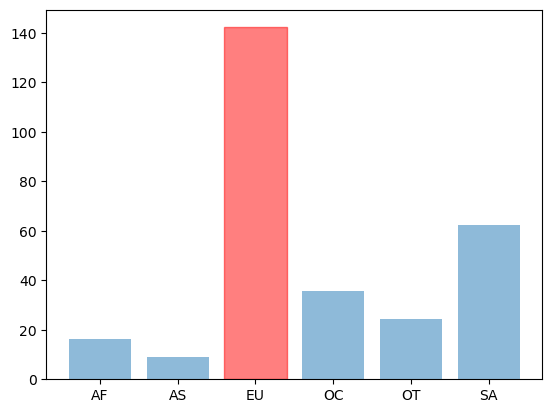

In [5]:
# 대륙별 wine_servings 그래프 그리기
continent_list = wine_mean_continent.index.tolist()
bar_list = plt.bar(continent_list, wine_mean_continent.values, alpha = 0.5)

# 가장 소비량이 큰 대륙 강조하기
wine_max_index = wine_mean_continent.idxmax()
bar_list[continent_list.index(wine_max_index)].set_color('r')

② 국가별 모든 servings의 합을 계산한 total_servings라는 피처를 생성합니다.

In [6]:
# total_servings 피처 생성하기
drinks['total_servings'] = drinks['beer_servings'] + drinks['wine_servings'] + drinks['spirit_servings']
drinks.head(10)

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
1,Albania,89,132,54,4.9,EU,275
2,Algeria,25,0,14,0.7,AF,39
3,Andorra,245,138,312,12.4,EU,695
4,Angola,217,57,45,5.9,AF,319
5,Antigua & Barbuda,102,128,45,4.9,OT,275
6,Argentina,193,25,221,8.3,SA,439
7,Armenia,21,179,11,3.8,EU,211
8,Australia,261,72,212,10.4,OC,545
9,Austria,279,75,191,9.7,EU,545


③ 전체 평균보다 적은 알코올을 마시는 대륙 중, spirit를 가장 많이 마시는 국가를 찾아봅니다.

In [7]:
# 전체 평균 total_servings 구하기
total_mean = drinks['total_servings'].mean()
total_mean

236.60621761658032

In [8]:
# 대륙별 평균 total_servings 구하기
continent_mean = drinks.groupby('continent').total_servings.mean()
continent_mean

continent
AF     94.075472
AS    106.954545
EU    468.555556
OC    183.750000
OT    335.695652
SA    352.250000
Name: total_servings, dtype: float64

In [9]:
# 조건에 맞는(대륙별 평균 <= 전체 평균) 대륙 찾기
less_than_total = continent_mean[continent_mean <= total_mean]
less_than_total

continent
AF     94.075472
AS    106.954545
OC    183.750000
Name: total_servings, dtype: float64

In [10]:
# 위 조건에 맞는 대륙이 포함된 데이터 다시 뽑기
spirit_continent = drinks.loc[drinks['continent'].isin(less_than_total.index)]
spirit_continent

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent,total_servings
0,Afghanistan,0,0,0,0.0,AS,0
2,Algeria,25,0,14,0.7,AF,39
4,Angola,217,57,45,5.9,AF,319
8,Australia,261,72,212,10.4,OC,545
12,Bahrain,42,63,7,2.0,AS,112
...,...,...,...,...,...,...,...
187,Vanuatu,21,18,11,0.9,OC,50
189,Vietnam,111,2,1,2.0,AS,114
190,Yemen,6,0,0,0.1,AS,6
191,Zambia,32,19,4,2.5,AF,55


In [11]:
# 이 중 spirit_servings이 가장 많은 나라 찾기
the_best_spirit = spirit_continent.loc[spirit_continent['spirit_servings'].idxmax()]
the_best_spirit['country']

'Russian Federation'

④ 술 소비량 대비 알코올 비율을 구해봅니다.

In [12]:
# 술 소비량 대비 알코올 비율 구하기
drinks['alcohol_rate'] = drinks['total_litres_of_pure_alcohol'] / drinks['total_servings']    # object 임 !!
drinks['alcohol_rate'] = drinks['alcohol_rate'].fillna('0')
# drinks['alcohol_rate'].astype('float') 안 됨!
drinks['alcohol_rate'] = drinks['alcohol_rate'].apply(lambda x: float(x))    # 형 변환을 시켜주어야 함 

## 술 소비량 대비 알콜 비율 : 전체 순위 중 한국의 순위를 구합니다.
drinks['alcohol_rate_rank'] = drinks['alcohol_rate'].rank(method = 'max', ascending=False)
drinks['alcohol_rate_rank'] = drinks['alcohol_rate_rank'].apply(np.floor)
drinks.loc[drinks['country'] == "South Korea"].alcohol_rate_rank

138    15.0
Name: alcohol_rate_rank, dtype: float64

In [13]:
drinks[['alcohol_rate', 'alcohol_rate_rank']]

,alcohol_rate,alcohol_rate_rank
0,0.000000,193.0
1,0.017818,121.0
2,0.017949,78.0
3,0.017842,114.0
4,0.018495,49.0
...,...,...
188,0.017661,158.0
189,0.017544,172.0
190,0.016667,180.0
191,0.045455,18.0


⑤ 대륙별로 술 소비량 대비 알코올 비율을 계산합니다.

In [14]:
total_rate_continent = drinks.groupby('continent').sum()
total_rate_continent['total_rate'] = total_rate_continent['total_litres_of_pure_alcohol'] / total_rate_continent['total_servings']

total_rate_continent = total_rate_continent.reset_index()
total_rate_continent[['continent', 'total_rate']]

,continent,total_rate
0,AF,0.031970
1,AS,0.020293
2,EU,0.018392
3,OC,0.018401
4,OT,0.017860
5,SA,0.017909


In [15]:
## 대륙별 술 소비량 대비 알콜 비율을 구합니다.
continent_sum = drinks.groupby('continent').sum()
continent_sum['alcohol_rate_continent'] = continent_sum['total_litres_of_pure_alcohol'] / \
                                          continent_sum['total_servings']
continent_sum = continent_sum.reset_index()
continent_sum = continent_sum[['continent', 'alcohol_rate_continent']]

drinks = pd.merge(drinks, continent_sum, on='continent', how='outer')

In [16]:
# 결과를 출력합니다.
drinks[['country', 'continent', 'alcohol_rate_continent']].sample(5).head()

,country,continent,alcohol_rate_continent
168,Chile,SA,0.017909
48,Azerbaijan,EU,0.018392
89,Algeria,AF,0.031970
192,Vanuatu,OC,0.018401
150,Dominican Republic,OT,0.017860
